In [1]:
import requests        # for making http requests to binance
import json            # for parsing what binance sends back to us
import pandas as pd    # for storing and manipulating the data we get back
import numpy as np     # numerical python, i usually need this somewhere 
                       # and so i import by habit nowadays

import matplotlib.pyplot as plt # for charts and such
import matplotlib.ticker as ticker

import itertools
from scipy import stats
from sklearn.model_selection import TimeSeriesSplit
from scipy.stats import pearsonr


from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
import statsmodels.api as sm
# from statsmodels.tsa.arima_model import ARIMA
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt
from arch import arch_model

import seaborn as sns

from plotly.offline import init_notebook_mode, iplot
from plotly import graph_objs as go

from pylab import rcParams
import pmdarima as pm

# Initialize plotly
init_notebook_mode(connected=True)

from fbprophet import Prophet
import logging
logging.getLogger().setLevel(logging.ERROR)

import datetime as dt  # for dealing with times
%matplotlib inline 

import warnings
warnings.simplefilter('ignore')

In [2]:
df_coinmarket_price_1h = pd.read_csv('datasets/cryptodatadownload/Coinbase_BTCUSD_1h.csv', skiprows=1)
df_coinmarket_price_d = pd.read_csv('datasets/cryptodatadownload/Coinbase_BTCUSD_d.csv', skiprows=1)

In [3]:
#coinmarket
df_coinmarket_price_1h['Date'] = pd.to_datetime(df_coinmarket_price_1h['Date'], format="%Y-%m-%d %I-%p")
df_coinmarket_price_d['Date'] = pd.to_datetime(df_coinmarket_price_d['Date'], format="%Y-%m-%d")

In [4]:
print('------------', 'df_coinmarket_price_d', '------------')
print(df_coinmarket_price_d['Date'].max())
print(df_coinmarket_price_d['Date'].min())
print('------------', 'df_coinmarket_price_1h', '------------')
print(df_coinmarket_price_1h['Date'].max())
print(df_coinmarket_price_1h['Date'].min())

------------ df_coinmarket_price_d ------------
2020-04-01 00:00:00
2014-12-01 00:00:00
------------ df_coinmarket_price_1h ------------
2020-04-01 11:00:00
2017-07-01 11:00:00


In [5]:
print('------------', 'df_coinmarket_price_d', '------------')
print(df_coinmarket_price_d.shape[0])
print('------------', 'df_coinmarket_price_1h', '------------')
print(df_coinmarket_price_1h.shape[0])

------------ df_coinmarket_price_d ------------
1937
------------ df_coinmarket_price_1h ------------
24121


In [34]:
def perform_metrics(y_truth, y_forecasted): 
    
    mae = round(mean_absolute_error(y_truth, y_forecasted) ,4)
    mape = round(np.mean(np.abs((y_truth - y_forecasted) / y_truth)) * 100, 4)
    mse = round(mean_squared_error(y_truth, y_forecasted), 4)
    rmse = round(mse**(0.5), 4)
    rmspe = round((np.sqrt(np.mean(np.square((y_truth - y_forecasted) / y_truth)))) * 100, 4)
    r2 = round(r2_score(y_truth, y_forecasted), 4)
    corr, _ = pearsonr(y_truth, y_forecasted)
    pearson = round(corr, 4)
    
#     print('mae', mae)
#     print('mape', mape)
#     print('mse', mse)
#     print('rmse', rmse)
#     print('rmspe', rmspe)
#     print('r2', r2)
#     print('pearson', pearson)
    
    return mae, mape, mse, rmse, rmspe, r2, pearson

AIC 17288.249021280662 best_params (0.95, 0.0)
last_index 2019-02-28 00:00:00
pred [3794.85092338]
last_index 2019-03-01 00:00:00
pred [3807.81660124]
last_index 2019-03-02 00:00:00
pred [3811.82238777]
last_index 2019-03-03 00:00:00
pred [3790.3736757]
last_index 2019-03-04 00:00:00
pred [3707.34606242]
last_index 2019-03-05 00:00:00
pred [3839.96623261]
last_index 2019-03-06 00:00:00
pred [3853.53149097]
last_index 2019-03-07 00:00:00
pred [3859.10728801]
last_index 2019-03-08 00:00:00
pred [3846.14751858]
last_index 2019-03-09 00:00:00
pred [3915.73556647]
last_index 2019-03-10 00:00:00
pred [3903.91598879]
last_index 2019-03-11 00:00:00
pred [3854.61804383]
last_index 2019-03-12 00:00:00
pred [3861.97833192]
last_index 2019-03-13 00:00:00
pred [3853.7923921]
last_index 2019-03-14 00:00:00
pred [3856.16966942]
last_index 2019-03-15 00:00:00
pred [3902.72630759]
last_index 2019-03-16 00:00:00
pred [3987.92492957]
last_index 2019-03-17 00:00:00
pred [3970.35812953]
last_index 2019-03-

last_index 2019-08-17 00:00:00
pred [10230.44961096]
last_index 2019-08-18 00:00:00
pred [10317.04779384]
last_index 2019-08-19 00:00:00
pred [10896.01882512]
last_index 2019-08-20 00:00:00
pred [10781.51059825]
last_index 2019-08-21 00:00:00
pred [10168.27168758]
last_index 2019-08-22 00:00:00
pred [10115.88765539]
last_index 2019-08-23 00:00:00
pred [10401.95774359]
last_index 2019-08-24 00:00:00
pred [10166.35976775]
last_index 2019-08-25 00:00:00
pred [10145.7918254]
last_index 2019-08-26 00:00:00
pred [10356.67346316]
last_index 2019-08-27 00:00:00
pred [10186.79498172]
last_index 2019-08-28 00:00:00
pred [9743.36715657]
last_index 2019-08-29 00:00:00
pred [9512.72379592]
last_index 2019-08-30 00:00:00
pred [9584.28862306]
last_index 2019-08-31 00:00:00
pred [9605.39438554]
last_index 2019-09-01 00:00:00
pred [9763.92070014]
last_index 2019-09-02 00:00:00
pred [10356.19805121]
last_index 2019-09-03 00:00:00
pred [10620.81121927]
last_index 2019-09-04 00:00:00
pred [10589.69863345]

last_index 2020-01-25 00:00:00
pred [8336.25512464]
last_index 2020-01-26 00:00:00
pred [8586.46078611]
last_index 2020-01-27 00:00:00
pred [8885.03736132]
last_index 2020-01-28 00:00:00
pred [9373.84937975]
last_index 2020-01-29 00:00:00
pred [9297.47482497]
last_index 2020-01-30 00:00:00
pred [9497.67528304]
last_index 2020-01-31 00:00:00
pred [9347.9026046]
last_index 2020-02-01 00:00:00
pred [9383.36903193]
last_index 2020-02-02 00:00:00
pred [9331.26476106]
last_index 2020-02-03 00:00:00
pred [9287.77697978]
last_index 2020-02-04 00:00:00
pred [9175.18677108]
last_index 2020-02-05 00:00:00
pred [9596.80531311]
last_index 2020-02-06 00:00:00
pred [9759.68831854]
last_index 2020-02-07 00:00:00
pred [9810.65336336]
last_index 2020-02-08 00:00:00
pred [9905.9523081]
last_index 2020-02-09 00:00:00
pred [10160.42986413]
last_index 2020-02-10 00:00:00
pred [9872.23940326]
last_index 2020-02-11 00:00:00
pred [10255.3707118]
last_index 2020-02-12 00:00:00
pred [10351.63308266]
last_index 2

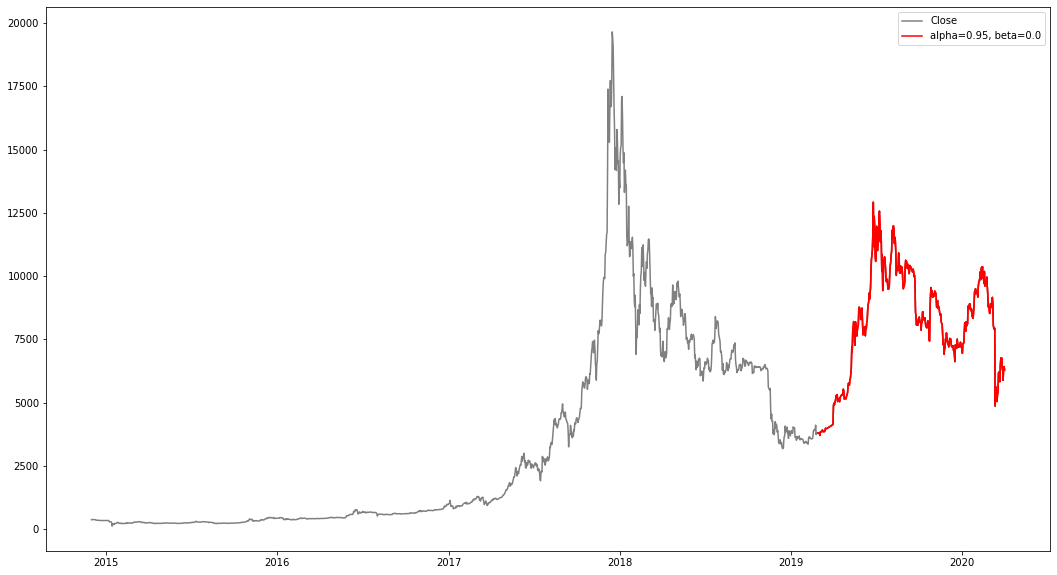

len 387 387
mae 12.4462 mape 0.1511 mse 369.8041 rmse 19.2303 rmspe 0.2581 r2 0.9999 pearson 1.0


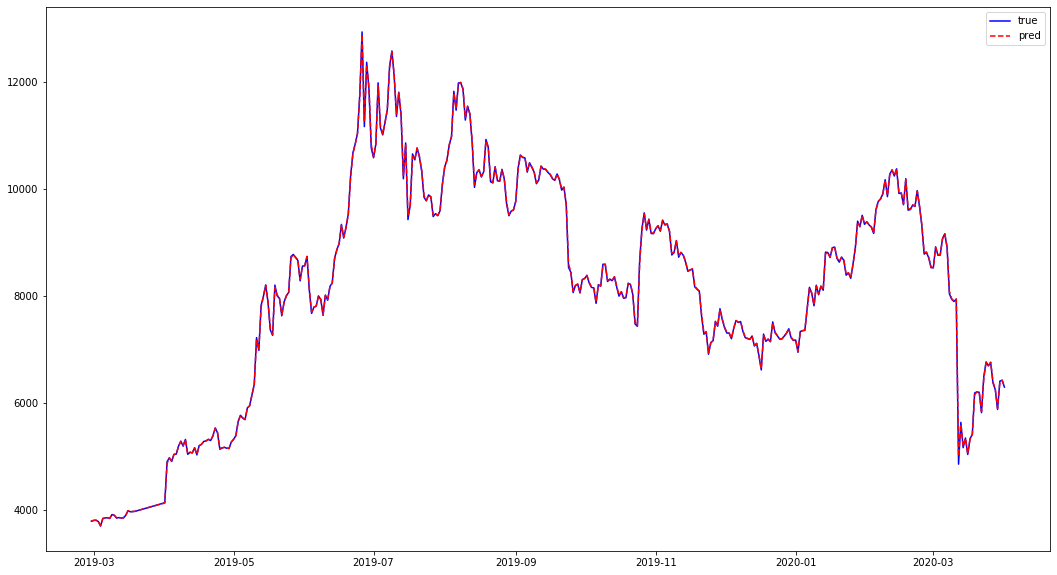

In [13]:
class ExponentialSmoothing(object):
    
    def __init__(self, df, percentage_train_size, list_alpha, list_beta):
        
        self.df = df
        self.percentage_train_size = percentage_train_size
        self.list_alpha = list_alpha
        self.list_beta = list_beta
            
    def perform(self):
        
        best_params, last_index = self.create_model()
        
        array_pred = np.array([])
        
        for row in self.df.iloc[-last_index:].itertuples():
            
            pred = self.prediction(best_params = best_params, last_index = row[0])
            array_pred = np.append(array_pred, pred)
            print('last_index', row[0])
            print('pred', pred)
        
        print('---')
        print('list_pred', array_pred)
        print('df close', self.df.iloc[-last_index:]['Close'].values)

            
        fig, ax = plt.subplots(figsize=(18, 10))
        ax.plot(self.df.index[:-last_index], self.df['Close'].values[:-last_index], color="gray")
        ax.plot(self.df.index[-last_index:], self.df['Close'].values[-last_index:], label = 'Close', color="gray")
        ax.plot(self.df.index[-last_index:], self.df.iloc[-last_index:]['Close'].values, color = 'r')
        ax.plot(self.df.index[-last_index:], array_pred.reshape(-1, 1), label="alpha="+str(best_params[0])+", beta="+str(best_params[1]), color = 'r')
        ax.legend()
        plt.show()
        
        y_true = self.df.iloc[-last_index:]['Close'].values
        y_pred = array_pred.reshape(-1, 1)
        print('len', len(y_true), len(y_pred)) #somente para checar
        
        data = {
            'y_true': self.df.iloc[-last_index:]['Close'].values,
            'y_pred': array_pred
        }
        
        df_aux = pd.DataFrame(data)
        
        mae, mape, mse, rmse, rmspe, r2, pearson = self.perform_metrics(df_aux['y_true'], df_aux['y_pred'])
        print('mae', mae,
              'mape', mape,
              'mse', mse,
              'rmse', rmse,
              'rmspe', rmspe,
              'r2', r2,
              'pearson', pearson)
        
        fig, ax = plt.subplots(figsize=(18, 10))
        ax.plot(self.df.iloc[-last_index:].index, y_true, color="b", label = "true")
        ax.plot(self.df.iloc[-last_index:].index, y_pred, color="r", linestyle = '--', label = "pred")
        ax.legend()
        plt.show()
        
        return True
    
    def prediction(self, best_params, last_index):
        
        model = Holt(np.asarray(self.df[:last_index]))
                
        fit_model = model.fit(smoothing_level = best_params[0], smoothing_slope = best_params[1])
        pred = fit_model.forecast( steps = 1)
        
        return pred
    
    def create_model(self):
        
        last_index = int(len(self.df)*(1 - self.percentage_train_size))
        
        model = Holt(np.asarray(self.df.iloc[:-last_index]))
        best_aic = np.inf
        best_fit = 0
        
        for alpha in self.list_alpha:
            
            for beta in self.list_beta:
            
                fit_model = model.fit(smoothing_level = alpha, smoothing_slope = beta)
                
                if fit_model.aic < best_aic:
                    best_aic = fit_model.aic
                    best_fit = fit_model
                    best_params = (alpha, beta)
        
        print('AIC', best_aic, 'best_params', best_params)
        
        return best_params, last_index
    
    def perform_metrics(self, y_truth, y_forecasted): 

        mae = round(mean_absolute_error(y_truth, y_forecasted) ,4)
        mape = round(np.mean(np.abs((y_truth - y_forecasted) / y_truth)) * 100, 4)
        mse = round(mean_squared_error(y_truth, y_forecasted), 4)
        rmse = round(mse**(0.5), 4)
        rmspe = round((np.sqrt(np.mean(np.square((y_truth - y_forecasted) / y_truth)))) * 100, 4)
        r2 = round(r2_score(y_truth, y_forecasted), 4)
        corr, _ = pearsonr(y_truth, y_forecasted)
        pearson = round(corr, 4)

#         print('mae', mae)
#         print('mape', mape)
#         print('mse', mse)
#         print('rmse', rmse)
#         print('rmspe', rmspe)
#         print('r2', r2)
#         print('pearson', pearson)
    
        return mae, mape, mse, rmse, rmspe, r2, pearson
    
### MAIN

# df = df_coinmarket_price_1h.copy()
df = df_coinmarket_price_d.copy()

df['Date'] = pd.to_datetime(df['Date'])
#print('null\n', df.isnull().sum())

df = df.set_index('Date')
df = df.loc[:, ['Close']]
df = df.sort_values(by = ['Date'])

days = 1
list_alpha = [a/100 for a in range(0, 100, 5)]
list_beta = [b/100 for b in range(0, 100, 5)]
exponential_smoothing = ExponentialSmoothing(df = df,
                                             percentage_train_size = 0.80, 
                                             list_alpha = list_alpha, 
                                             list_beta = list_beta
                                            )
_ = exponential_smoothing.perform()


In [49]:
#diario
# variando 1 ticket 
# mae 4.8521 mape 0.0597 mse 35.0715 rmse 5.9221 rmspe 0.0747 r2 1.0 pears
# AIC 17276.259290836486 best_params (0.99, 0.0)
# 80% treino

#diario
# variando 5 ticket
# mae 12.4462 mape 0.1511 mse 369.8041 rmse 19.2303 rmspe 0.2581 r2 0.9999 pearson 1.0
# AIC 17288.249021280662 best_params (0.95, 0.0)
# 80% treino

#por hora 
#variando 5 ticket
#mae 1.7675 mape 0.023 mse 10.7606 rmse 3.2803 rmspe 0.0485 r2 1.0 pearson 1.0
#AIC 174734.91212908336 best_params (0.95, 0.0)
#80% treino

aic: 229438.22 | order: (2, 1, 2)
last_index 2019-09-13 12:00:00
pred 10342.161454963756
last_index 2019-09-13 13:00:00
pred 10326.436287227534
last_index 2019-09-13 14:00:00
pred 10302.779798962676
last_index 2019-09-13 15:00:00
pred 10313.238590984996
last_index 2019-09-13 16:00:00
pred 10310.781075131072
last_index 2019-09-13 17:00:00
pred 10239.919220642885
last_index 2019-09-13 18:00:00
pred 10235.062382171043
last_index 2019-09-13 19:00:00
pred 10217.67453581673
last_index 2019-09-13 20:00:00
pred 10270.281545047808
last_index 2019-09-13 21:00:00
pred 10299.479301990355
last_index 2019-09-13 22:00:00
pred 10295.557316512717
last_index 2019-09-13 23:00:00
pred 10361.867884882027
last_index 2019-09-14 00:00:00
pred 10333.261056898744
last_index 2019-09-14 01:00:00
pred 10332.354341757688
last_index 2019-09-14 02:00:00
pred 10303.725986755722
last_index 2019-09-14 03:00:00
pred 10305.20169979219
last_index 2019-09-14 04:00:00
pred 10297.653599811363
last_index 2019-09-14 05:00:00
pr

last_index 2019-09-19 18:00:00
pred 10044.667840736547
last_index 2019-09-19 19:00:00
pred 10103.845618193764
last_index 2019-09-19 20:00:00
pred 10248.016255872657
last_index 2019-09-19 21:00:00
pred 10253.533934164241
last_index 2019-09-19 22:00:00
pred 10238.190851846337
last_index 2019-09-19 23:00:00
pred 10271.570194447258
last_index 2019-09-20 00:00:00
pred 10239.847165312296
last_index 2019-09-20 01:00:00
pred 10218.462845089125
last_index 2019-09-20 02:00:00
pred 10205.06916662709
last_index 2019-09-20 03:00:00
pred 10227.435204418936
last_index 2019-09-20 04:00:00
pred 10214.625446700466
last_index 2019-09-20 05:00:00
pred 10173.500448500488
last_index 2019-09-20 06:00:00
pred 10174.1890207435
last_index 2019-09-20 07:00:00
pred 10158.265332615989
last_index 2019-09-20 08:00:00
pred 10145.836016347108
last_index 2019-09-20 09:00:00
pred 10141.725747631184
last_index 2019-09-20 10:00:00
pred 10153.151122060019
last_index 2019-09-20 11:00:00
pred 10159.45041046607
last_index 201

last_index 2019-09-26 02:00:00
pred 8369.631566357331
last_index 2019-09-26 03:00:00
pred 8364.103394857892
last_index 2019-09-26 04:00:00
pred 8362.134887649025
last_index 2019-09-26 05:00:00
pred 8387.895227103758
last_index 2019-09-26 06:00:00
pred 8384.02702828886
last_index 2019-09-26 07:00:00
pred 8373.665815598655
last_index 2019-09-26 08:00:00
pred 8409.229289950783
last_index 2019-09-26 09:00:00
pred 8437.377095769774
last_index 2019-09-26 10:00:00
pred 8441.455259956565
last_index 2019-09-26 11:00:00
pred 8387.204294216424
last_index 2019-09-26 12:00:00
pred 8423.361995811769
last_index 2019-09-26 13:00:00
pred 8262.70346649942
last_index 2019-09-26 14:00:00
pred 8207.72210940184
last_index 2019-09-26 15:00:00
pred 7940.114639185336
last_index 2019-09-26 16:00:00
pred 7949.606096132578
last_index 2019-09-26 17:00:00
pred 7923.6299218394015
last_index 2019-09-26 18:00:00
pred 8116.800007342727
last_index 2019-09-26 19:00:00
pred 8120.665117003599
last_index 2019-09-26 20:00:00

last_index 2019-10-02 10:00:00
pred 8266.56841245247
last_index 2019-10-02 11:00:00
pred 8282.71987998719
last_index 2019-10-02 12:00:00
pred 8236.894919891842
last_index 2019-10-02 13:00:00
pred 8230.509620901108
last_index 2019-10-02 14:00:00
pred 8249.168978213816
last_index 2019-10-02 15:00:00
pred 8249.50185630468
last_index 2019-10-02 16:00:00
pred 8226.540099710617
last_index 2019-10-02 17:00:00
pred 8242.69274775024
last_index 2019-10-02 18:00:00
pred 8235.80596847148
last_index 2019-10-02 19:00:00
pred 8265.138364010683
last_index 2019-10-02 20:00:00
pred 8231.164566798465
last_index 2019-10-02 21:00:00
pred 8268.027770818555
last_index 2019-10-02 22:00:00
pred 8277.70392398727
last_index 2019-10-02 23:00:00
pred 8376.38797955855
last_index 2019-10-03 00:00:00
pred 8340.161200271456
last_index 2019-10-03 01:00:00
pred 8347.83201525931
last_index 2019-10-03 02:00:00
pred 8366.017169067944
last_index 2019-10-03 03:00:00
pred 8346.041702558068
last_index 2019-10-03 04:00:00
pred 

last_index 2019-10-08 18:00:00
pred 8194.417188165562
last_index 2019-10-08 19:00:00
pred 8170.2303822277645
last_index 2019-10-08 20:00:00
pred 8134.420259984824
last_index 2019-10-08 21:00:00
pred 8165.652871801601
last_index 2019-10-08 22:00:00
pred 8195.687839278033
last_index 2019-10-08 23:00:00
pred 8179.796331474868
last_index 2019-10-09 00:00:00
pred 8185.532479217359
last_index 2019-10-09 01:00:00
pred 8173.76875353009
last_index 2019-10-09 02:00:00
pred 8164.402969222913
last_index 2019-10-09 03:00:00
pred 8129.672706661464
last_index 2019-10-09 04:00:00
pred 8136.540652231882
last_index 2019-10-09 05:00:00
pred 8150.2521350840725
last_index 2019-10-09 06:00:00
pred 8148.204153463524
last_index 2019-10-09 07:00:00
pred 8172.393258195586
last_index 2019-10-09 08:00:00
pred 8191.490236017732
last_index 2019-10-09 09:00:00
pred 8194.464065196787
last_index 2019-10-09 10:00:00
pred 8206.792855048754
last_index 2019-10-09 11:00:00
pred 8193.616123328175
last_index 2019-10-09 12:00

last_index 2019-10-15 03:00:00
pred 8318.121559480309
last_index 2019-10-15 04:00:00
pred 8331.067788632852
last_index 2019-10-15 05:00:00
pred 8330.031545768727
last_index 2019-10-15 06:00:00
pred 8306.336910336013
last_index 2019-10-15 07:00:00
pred 8289.80782670375
last_index 2019-10-15 08:00:00
pred 8290.6524600345
last_index 2019-10-15 09:00:00
pred 8281.59995733526
last_index 2019-10-15 10:00:00
pred 8313.004930122936
last_index 2019-10-15 11:00:00
pred 8294.77779180464
last_index 2019-10-15 12:00:00
pred 8319.60178654361
last_index 2019-10-15 13:00:00
pred 8304.56135637185
last_index 2019-10-15 14:00:00
pred 8262.853610276105
last_index 2019-10-15 15:00:00
pred 8319.206682018172
last_index 2019-10-15 16:00:00
pred 8187.667390965617
last_index 2019-10-15 17:00:00
pred 8172.723376089513
last_index 2019-10-15 18:00:00
pred 8174.687399013897
last_index 2019-10-15 19:00:00
pred 8174.147468976368
last_index 2019-10-15 20:00:00
pred 8142.21991826313
last_index 2019-10-15 21:00:00
pred 

last_index 2019-10-21 12:00:00
pred 8237.935684578051
last_index 2019-10-21 13:00:00
pred 8242.417379459293
last_index 2019-10-21 14:00:00
pred 8262.638182852737
last_index 2019-10-21 15:00:00
pred 8198.02450783874
last_index 2019-10-21 16:00:00
pred 8189.325489901595
last_index 2019-10-21 17:00:00
pred 8200.481328540722
last_index 2019-10-21 18:00:00
pred 8181.843136503593
last_index 2019-10-21 19:00:00
pred 8201.274656888601
last_index 2019-10-21 20:00:00
pred 8205.761883943254
last_index 2019-10-21 21:00:00
pred 8215.566907060087
last_index 2019-10-21 22:00:00
pred 8198.99927148045
last_index 2019-10-21 23:00:00
pred 8210.371610101798
last_index 2019-10-22 00:00:00
pred 8197.837677598958
last_index 2019-10-22 01:00:00
pred 8182.289752415764
last_index 2019-10-22 02:00:00
pred 8200.122329343068
last_index 2019-10-22 03:00:00
pred 8216.880133120196
last_index 2019-10-22 04:00:00
pred 8223.259278180145
last_index 2019-10-22 05:00:00
pred 8223.058749723892
last_index 2019-10-22 06:00:00

last_index 2019-10-27 21:00:00
pred 9634.531659077566
last_index 2019-10-27 22:00:00
pred 9585.955595990861
last_index 2019-10-27 23:00:00
pred 9554.69655018835
last_index 2019-10-28 00:00:00
pred 9718.908203012834
last_index 2019-10-28 01:00:00
pred 9748.91987295651
last_index 2019-10-28 02:00:00
pred 9757.139776773392
last_index 2019-10-28 03:00:00
pred 9650.33856141479
last_index 2019-10-28 04:00:00
pred 9645.522104384972
last_index 2019-10-28 05:00:00
pred 9631.279640775703
last_index 2019-10-28 06:00:00
pred 9474.027216364522
last_index 2019-10-28 07:00:00
pred 9464.325060224995
last_index 2019-10-28 08:00:00
pred 9381.526810477082
last_index 2019-10-28 09:00:00
pred 9428.840634320295
last_index 2019-10-28 10:00:00
pred 9434.879552492743
last_index 2019-10-28 11:00:00
pred 9422.16783117873
last_index 2019-10-28 12:00:00
pred 9347.284658612676
last_index 2019-10-28 13:00:00
pred 9385.287128065338
last_index 2019-10-28 14:00:00
pred 9348.207102501834
last_index 2019-10-28 15:00:00
p

last_index 2019-11-03 06:00:00
pred 9281.648741105031
last_index 2019-11-03 07:00:00
pred 9264.154577187244
last_index 2019-11-03 08:00:00
pred 9234.996714813406
last_index 2019-11-03 09:00:00
pred 9236.201725235913
last_index 2019-11-03 10:00:00
pred 9155.330047733974
last_index 2019-11-03 11:00:00
pred 9175.23268528334
last_index 2019-11-03 12:00:00
pred 9159.471143956907
last_index 2019-11-03 13:00:00
pred 9184.15043800573
last_index 2019-11-03 14:00:00
pred 9158.390447025608
last_index 2019-11-03 15:00:00
pred 9191.512853972505
last_index 2019-11-03 16:00:00
pred 9174.007885387475
last_index 2019-11-03 17:00:00
pred 9165.378613895295
last_index 2019-11-03 18:00:00
pred 9166.56616437058
last_index 2019-11-03 19:00:00
pred 9142.136459597197
last_index 2019-11-03 20:00:00
pred 9159.499837052474
last_index 2019-11-03 21:00:00
pred 9155.240348084324
last_index 2019-11-03 22:00:00
pred 9215.133198272983
last_index 2019-11-03 23:00:00
pred 9204.12953459065
last_index 2019-11-04 00:00:00
p

last_index 2019-11-09 15:00:00
pred 8800.617749023946
last_index 2019-11-09 16:00:00
pred 8754.812397926455
last_index 2019-11-09 17:00:00
pred 8775.178014941384
last_index 2019-11-09 18:00:00
pred 8765.307783811808
last_index 2019-11-09 19:00:00
pred 8761.840556716554
last_index 2019-11-09 20:00:00
pred 8773.905057804586
last_index 2019-11-09 21:00:00
pred 8798.852649087594
last_index 2019-11-09 22:00:00
pred 8793.189755550615
last_index 2019-11-09 23:00:00
pred 8807.511528297344
last_index 2019-11-10 00:00:00
pred 8772.259570239605
last_index 2019-11-10 01:00:00
pred 8785.492972894075
last_index 2019-11-10 02:00:00
pred 8769.438562946123
last_index 2019-11-10 03:00:00
pred 8771.691955045493
last_index 2019-11-10 04:00:00
pred 8787.824895150674
last_index 2019-11-10 05:00:00
pred 8857.745865539871
last_index 2019-11-10 06:00:00
pred 8838.30346628022
last_index 2019-11-10 07:00:00
pred 8844.804582319899
last_index 2019-11-10 08:00:00
pred 8816.707504814312
last_index 2019-11-10 09:00:0

last_index 2019-11-16 00:00:00
pred 8456.721391826146
last_index 2019-11-16 01:00:00
pred 8471.625378777133
last_index 2019-11-16 02:00:00
pred 8447.752723400183
last_index 2019-11-16 03:00:00
pred 8451.156947226033
last_index 2019-11-16 04:00:00
pred 8463.31153960346
last_index 2019-11-16 05:00:00
pred 8466.772858567321
last_index 2019-11-16 06:00:00
pred 8459.991426352079
last_index 2019-11-16 07:00:00
pred 8471.941490492172
last_index 2019-11-16 08:00:00
pred 8480.853144244382
last_index 2019-11-16 09:00:00
pred 8495.786797467648
last_index 2019-11-16 10:00:00
pred 8464.954446769392
last_index 2019-11-16 11:00:00
pred 8475.29254776798
last_index 2019-11-16 12:00:00
pred 8466.258302658578
last_index 2019-11-16 13:00:00
pred 8485.140828808117
last_index 2019-11-16 14:00:00
pred 8482.46727937709
last_index 2019-11-16 15:00:00
pred 8484.90008347257
last_index 2019-11-16 16:00:00
pred 8487.711598794582
last_index 2019-11-16 17:00:00
pred 8472.576913418405
last_index 2019-11-16 18:00:00
p

last_index 2019-11-22 08:00:00
pred 7511.19199287297
last_index 2019-11-22 09:00:00
pred 7408.289085966599
last_index 2019-11-22 10:00:00
pred 7094.934592445427
last_index 2019-11-22 11:00:00
pred 7117.687287469325
last_index 2019-11-22 12:00:00
pred 7148.349144354049
last_index 2019-11-22 13:00:00
pred 7045.789794812952
last_index 2019-11-22 14:00:00
pred 7048.423705465613
last_index 2019-11-22 15:00:00
pred 7120.611577535338
last_index 2019-11-22 16:00:00
pred 7126.389410848507
last_index 2019-11-22 17:00:00
pred 7149.183208269444
last_index 2019-11-22 18:00:00
pred 7229.009081066656
last_index 2019-11-22 19:00:00
pred 7302.018573387306
last_index 2019-11-22 20:00:00
pred 7324.523506040834
last_index 2019-11-22 21:00:00
pred 7343.443499259602
last_index 2019-11-22 22:00:00
pred 7259.206300885938
last_index 2019-11-22 23:00:00
pred 7285.453845920326
last_index 2019-11-23 00:00:00
pred 7214.294177650671
last_index 2019-11-23 01:00:00
pred 7222.278051227703
last_index 2019-11-23 02:00:0

last_index 2019-11-28 16:00:00
pred 7608.85760940393
last_index 2019-11-28 17:00:00
pred 7590.3525141269165
last_index 2019-11-28 18:00:00
pred 7597.390946576668
last_index 2019-11-28 19:00:00
pred 7628.414795887409
last_index 2019-11-28 20:00:00
pred 7588.193562137894
last_index 2019-11-28 21:00:00
pred 7565.717205622931
last_index 2019-11-28 22:00:00
pred 7404.370838231084
last_index 2019-11-28 23:00:00
pred 7440.109968643385
last_index 2019-11-29 00:00:00
pred 7480.1081468762295
last_index 2019-11-29 01:00:00
pred 7470.5997519534485
last_index 2019-11-29 02:00:00
pred 7469.3375235219255
last_index 2019-11-29 03:00:00
pred 7497.246442382487
last_index 2019-11-29 04:00:00
pred 7481.1594932800535
last_index 2019-11-29 05:00:00
pred 7475.039705999266
last_index 2019-11-29 06:00:00
pred 7482.386550277407
last_index 2019-11-29 07:00:00
pred 7520.006735066113
last_index 2019-11-29 08:00:00
pred 7506.486919212231
last_index 2019-11-29 09:00:00
pred 7570.505649035615
last_index 2019-11-29 10

last_index 2019-12-05 00:00:00
pred 7221.360655314807
last_index 2019-12-05 01:00:00
pred 7225.9122817637335
last_index 2019-12-05 02:00:00
pred 7206.77857911627
last_index 2019-12-05 03:00:00
pred 7222.566504547009
last_index 2019-12-05 04:00:00
pred 7203.11245178869
last_index 2019-12-05 05:00:00
pred 7317.067950864868
last_index 2019-12-05 06:00:00
pred 7304.237360711998
last_index 2019-12-05 07:00:00
pred 7309.057759294416
last_index 2019-12-05 08:00:00
pred 7318.8154363603835
last_index 2019-12-05 09:00:00
pred 7316.0083329025065
last_index 2019-12-05 10:00:00
pred 7374.914261715436
last_index 2019-12-05 11:00:00
pred 7368.168232861717
last_index 2019-12-05 12:00:00
pred 7437.357628993936
last_index 2019-12-05 13:00:00
pred 7387.354785645616
last_index 2019-12-05 14:00:00
pred 7407.613674738488
last_index 2019-12-05 15:00:00
pred 7342.459054499328
last_index 2019-12-05 16:00:00
pred 7309.466610431518
last_index 2019-12-05 17:00:00
pred 7340.428644383066
last_index 2019-12-05 18:00

last_index 2019-12-11 08:00:00
pred 7212.156339795596
last_index 2019-12-11 09:00:00
pred 7227.1126919656845
last_index 2019-12-11 10:00:00
pred 7210.158845587807
last_index 2019-12-11 11:00:00
pred 7224.312113926095
last_index 2019-12-11 12:00:00
pred 7248.283480936073
last_index 2019-12-11 13:00:00
pred 7232.847061032941
last_index 2019-12-11 14:00:00
pred 7230.3555455643
last_index 2019-12-11 15:00:00
pred 7171.400286537431
last_index 2019-12-11 16:00:00
pred 7185.414564533507
last_index 2019-12-11 17:00:00
pred 7192.3357501552155
last_index 2019-12-11 18:00:00
pred 7182.268852839145
last_index 2019-12-11 19:00:00
pred 7191.682620118066
last_index 2019-12-11 20:00:00
pred 7167.575708890791
last_index 2019-12-11 21:00:00
pred 7187.354954791915
last_index 2019-12-11 22:00:00
pred 7192.5731771721985
last_index 2019-12-11 23:00:00
pred 7200.953017014187
last_index 2019-12-12 00:00:00
pred 7138.624319182183
last_index 2019-12-12 01:00:00
pred 7147.859434888975
last_index 2019-12-12 02:00

last_index 2019-12-17 16:00:00
pred 6734.090834070907
last_index 2019-12-17 17:00:00
pred 6709.679818761786
last_index 2019-12-17 18:00:00
pred 6709.453662589305
last_index 2019-12-17 19:00:00
pred 6618.731720494355
last_index 2019-12-17 20:00:00
pred 6590.01754278573
last_index 2019-12-17 21:00:00
pred 6616.08293362796
last_index 2019-12-17 22:00:00
pred 6582.564410456747
last_index 2019-12-17 23:00:00
pred 6617.107875784692
last_index 2019-12-18 00:00:00
pred 6643.829707800452
last_index 2019-12-18 01:00:00
pred 6650.773289531194
last_index 2019-12-18 02:00:00
pred 6687.730761369974
last_index 2019-12-18 03:00:00
pred 6678.4371152337335
last_index 2019-12-18 04:00:00
pred 6673.051735537635
last_index 2019-12-18 05:00:00
pred 6658.510341264372
last_index 2019-12-18 06:00:00
pred 6624.156847834262
last_index 2019-12-18 07:00:00
pred 6616.706428154616
last_index 2019-12-18 08:00:00
pred 6620.986734743911
last_index 2019-12-18 09:00:00
pred 6629.170288847096
last_index 2019-12-18 10:00:0

last_index 2019-12-24 00:00:00
pred 7305.702403699459
last_index 2019-12-24 01:00:00
pred 7306.727509582565
last_index 2019-12-24 02:00:00
pred 7321.333810099871
last_index 2019-12-24 03:00:00
pred 7306.257271945337
last_index 2019-12-24 04:00:00
pred 7306.915783064292
last_index 2019-12-24 05:00:00
pred 7328.933675321646
last_index 2019-12-24 06:00:00
pred 7319.882659314365
last_index 2019-12-24 07:00:00
pred 7258.099558783054
last_index 2019-12-24 08:00:00
pred 7349.306221774347
last_index 2019-12-24 09:00:00
pred 7358.252889109565
last_index 2019-12-24 10:00:00
pred 7382.601134332323
last_index 2019-12-24 11:00:00
pred 7363.499791796385
last_index 2019-12-24 12:00:00
pred 7352.474718478911
last_index 2019-12-24 13:00:00
pred 7372.422624285117
last_index 2019-12-24 14:00:00
pred 7344.566054527948
last_index 2019-12-24 15:00:00
pred 7272.634145671344
last_index 2019-12-24 16:00:00
pred 7294.509053531335
last_index 2019-12-24 17:00:00
pred 7225.660213181579
last_index 2019-12-24 18:00:

last_index 2019-12-30 08:00:00
pred 7349.657824659332
last_index 2019-12-30 09:00:00
pred 7313.184973872981
last_index 2019-12-30 10:00:00
pred 7292.231197354999
last_index 2019-12-30 11:00:00
pred 7299.006195150851
last_index 2019-12-30 12:00:00
pred 7291.092229822758
last_index 2019-12-30 13:00:00
pred 7300.525564534617
last_index 2019-12-30 14:00:00
pred 7284.635401932481
last_index 2019-12-30 15:00:00
pred 7238.26543473201
last_index 2019-12-30 16:00:00
pred 7235.4790083707885
last_index 2019-12-30 17:00:00
pred 7234.18902740646
last_index 2019-12-30 18:00:00
pred 7223.777039872805
last_index 2019-12-30 19:00:00
pred 7212.771064326095
last_index 2019-12-30 20:00:00
pred 7245.178691996306
last_index 2019-12-30 21:00:00
pred 7242.805224088339
last_index 2019-12-30 22:00:00
pred 7253.254634781782
last_index 2019-12-30 23:00:00
pred 7219.041109221364
last_index 2019-12-31 00:00:00
pred 7226.579737369796
last_index 2019-12-31 01:00:00
pred 7239.083287864587
last_index 2019-12-31 02:00:0

last_index 2020-01-05 16:00:00
pred 7455.294176939632
last_index 2020-01-05 17:00:00
pred 7460.948075465564
last_index 2020-01-05 18:00:00
pred 7433.173391369803
last_index 2020-01-05 19:00:00
pred 7440.395941385239
last_index 2020-01-05 20:00:00
pred 7429.245493030071
last_index 2020-01-05 21:00:00
pred 7361.415102395063
last_index 2020-01-05 22:00:00
pred 7352.265784289142
last_index 2020-01-05 23:00:00
pred 7356.852756540129
last_index 2020-01-06 00:00:00
pred 7373.228298792822
last_index 2020-01-06 01:00:00
pred 7413.734787608214
last_index 2020-01-06 02:00:00
pred 7539.718378257872
last_index 2020-01-06 03:00:00
pred 7533.625158617573
last_index 2020-01-06 04:00:00
pred 7526.945828427527
last_index 2020-01-06 05:00:00
pred 7527.313424614057
last_index 2020-01-06 06:00:00
pred 7510.657249499541
last_index 2020-01-06 07:00:00
pred 7504.487153545081
last_index 2020-01-06 08:00:00
pred 7541.06515243222
last_index 2020-01-06 09:00:00
pred 7540.012590690787
last_index 2020-01-06 10:00:0

last_index 2020-01-12 00:00:00
pred 8064.841383064594
last_index 2020-01-12 01:00:00
pred 8062.9740298192455
last_index 2020-01-12 02:00:00
pred 8091.194011950175
last_index 2020-01-12 03:00:00
pred 8086.80531606211
last_index 2020-01-12 04:00:00
pred 8067.98784102906
last_index 2020-01-12 05:00:00
pred 8100.577198761756
last_index 2020-01-12 06:00:00
pred 8081.514976258007
last_index 2020-01-12 07:00:00
pred 8093.360515988341
last_index 2020-01-12 08:00:00
pred 8131.559831119108
last_index 2020-01-12 09:00:00
pred 8126.694617611428
last_index 2020-01-12 10:00:00
pred 8118.794335317612
last_index 2020-01-12 11:00:00
pred 8104.830229266918
last_index 2020-01-12 12:00:00
pred 8130.6962020565525
last_index 2020-01-12 13:00:00
pred 8160.4262640464785
last_index 2020-01-12 14:00:00
pred 8132.502645727602
last_index 2020-01-12 15:00:00
pred 8146.462224802434
last_index 2020-01-12 16:00:00
pred 8098.780166605612
last_index 2020-01-12 17:00:00
pred 8095.800473999961
last_index 2020-01-12 18:00

last_index 2020-01-18 09:00:00
pred 8868.392083899673
last_index 2020-01-18 10:00:00
pred 8878.599982602365
last_index 2020-01-18 11:00:00
pred 8865.917912800409
last_index 2020-01-18 12:00:00
pred 8899.095056539545
last_index 2020-01-18 13:00:00
pred 8908.962297706672
last_index 2020-01-18 14:00:00
pred 8910.390791618092
last_index 2020-01-18 15:00:00
pred 8891.536159195792
last_index 2020-01-18 16:00:00
pred 8877.072324212562
last_index 2020-01-18 17:00:00
pred 8896.102194314572
last_index 2020-01-18 18:00:00
pred 8871.0107762418
last_index 2020-01-18 19:00:00
pred 8899.657827657813
last_index 2020-01-18 20:00:00
pred 8897.054283026362
last_index 2020-01-18 21:00:00
pred 8915.154505297307
last_index 2020-01-18 22:00:00
pred 8946.031727632087
last_index 2020-01-18 23:00:00
pred 8909.815676413024
last_index 2020-01-19 00:00:00
pred 8968.751176646743
last_index 2020-01-19 01:00:00
pred 9131.561704847105
last_index 2020-01-19 02:00:00
pred 9143.660255313493
last_index 2020-01-19 03:00:00

last_index 2020-01-24 18:00:00
pred 8473.15264429743
last_index 2020-01-24 19:00:00
pred 8488.21975472622
last_index 2020-01-24 20:00:00
pred 8473.367421723297
last_index 2020-01-24 21:00:00
pred 8496.772748610387
last_index 2020-01-24 22:00:00
pred 8448.252203702745
last_index 2020-01-24 23:00:00
pred 8430.923612307712
last_index 2020-01-25 00:00:00
pred 8305.0828183565
last_index 2020-01-25 01:00:00
pred 8280.06179269877
last_index 2020-01-25 02:00:00
pred 8307.503930861998
last_index 2020-01-25 03:00:00
pred 8283.87220251685
last_index 2020-01-25 04:00:00
pred 8298.232653838244
last_index 2020-01-25 05:00:00
pred 8308.232238125998
last_index 2020-01-25 06:00:00
pred 8310.609431551287
last_index 2020-01-25 07:00:00
pred 8295.176744805494
last_index 2020-01-25 08:00:00
pred 8345.840110076791
last_index 2020-01-25 09:00:00
pred 8323.99560176605
last_index 2020-01-25 10:00:00
pred 8315.175431396216
last_index 2020-01-25 11:00:00
pred 8297.984900750565
last_index 2020-01-25 12:00:00
pred

last_index 2020-01-31 03:00:00
pred 9427.99981999374
last_index 2020-01-31 04:00:00
pred 9401.603947614354
last_index 2020-01-31 05:00:00
pred 9333.808372856542
last_index 2020-01-31 06:00:00
pred 9362.129159076934
last_index 2020-01-31 07:00:00
pred 9346.86420935791
last_index 2020-01-31 08:00:00
pred 9359.992530130214
last_index 2020-01-31 09:00:00
pred 9332.892377138169
last_index 2020-01-31 10:00:00
pred 9318.895641818699
last_index 2020-01-31 11:00:00
pred 9309.955078363699
last_index 2020-01-31 12:00:00
pred 9268.957647444935
last_index 2020-01-31 13:00:00
pred 9256.588730328356
last_index 2020-01-31 14:00:00
pred 9246.176394098044
last_index 2020-01-31 15:00:00
pred 9314.424030539434
last_index 2020-01-31 16:00:00
pred 9271.08736374754
last_index 2020-01-31 17:00:00
pred 9264.576941702431
last_index 2020-01-31 18:00:00
pred 9296.314303815398
last_index 2020-01-31 19:00:00
pred 9286.71837961648
last_index 2020-01-31 20:00:00
pred 9303.719651339574
last_index 2020-01-31 21:00:00
p

last_index 2020-02-06 12:00:00
pred 9813.361165114626
last_index 2020-02-06 13:00:00
pred 9743.944320566761
last_index 2020-02-06 14:00:00
pred 9815.718175808626
last_index 2020-02-06 15:00:00
pred 9782.954470204722
last_index 2020-02-06 16:00:00
pred 9778.173766697122
last_index 2020-02-06 17:00:00
pred 9761.18212631101
last_index 2020-02-06 18:00:00
pred 9752.35994212005
last_index 2020-02-06 19:00:00
pred 9735.976270498077
last_index 2020-02-06 20:00:00
pred 9769.742657755722
last_index 2020-02-06 21:00:00
pred 9740.471899931572
last_index 2020-02-06 22:00:00
pred 9678.042839711157
last_index 2020-02-06 23:00:00
pred 9762.10585576616
last_index 2020-02-07 00:00:00
pred 9765.254187737884
last_index 2020-02-07 01:00:00
pred 9792.635814489584
last_index 2020-02-07 02:00:00
pred 9780.789652120173
last_index 2020-02-07 03:00:00
pred 9762.146736398603
last_index 2020-02-07 04:00:00
pred 9776.845318795966
last_index 2020-02-07 05:00:00
pred 9744.479975660333
last_index 2020-02-07 06:00:00


last_index 2020-02-12 20:00:00
pred 10394.245632495795
last_index 2020-02-12 21:00:00
pred 10391.167716094174
last_index 2020-02-12 22:00:00
pred 10361.706809372057
last_index 2020-02-12 23:00:00
pred 10352.654668171375
last_index 2020-02-13 00:00:00
pred 10397.21359839494
last_index 2020-02-13 01:00:00
pred 10419.263270306034
last_index 2020-02-13 02:00:00
pred 10426.738436894264
last_index 2020-02-13 03:00:00
pred 10409.46638848281
last_index 2020-02-13 04:00:00
pred 10417.459080238006
last_index 2020-02-13 05:00:00
pred 10448.265523565833
last_index 2020-02-13 06:00:00
pred 10474.385205101502
last_index 2020-02-13 07:00:00
pred 10365.457770222933
last_index 2020-02-13 08:00:00
pred 10276.711850952708
last_index 2020-02-13 09:00:00
pred 10181.560924831392
last_index 2020-02-13 10:00:00
pred 10173.158918209554
last_index 2020-02-13 11:00:00
pred 10156.143179617757
last_index 2020-02-13 12:00:00
pred 10210.00849691164
last_index 2020-02-13 13:00:00
pred 10246.612777427357
last_index 20

last_index 2020-02-19 03:00:00
pred 10169.538712084513
last_index 2020-02-19 04:00:00
pred 10133.88279107109
last_index 2020-02-19 05:00:00
pred 10141.168030587585
last_index 2020-02-19 06:00:00
pred 10095.279032849723
last_index 2020-02-19 07:00:00
pred 10077.88466139299
last_index 2020-02-19 08:00:00
pred 10175.155993572234
last_index 2020-02-19 09:00:00
pred 10134.46121086473
last_index 2020-02-19 10:00:00
pred 10148.862805624642
last_index 2020-02-19 11:00:00
pred 10231.196788660282
last_index 2020-02-19 12:00:00
pred 10124.404362640438
last_index 2020-02-19 13:00:00
pred 10138.402523648449
last_index 2020-02-19 14:00:00
pred 10136.998293830733
last_index 2020-02-19 15:00:00
pred 10138.453948823411
last_index 2020-02-19 16:00:00
pred 10187.509054646158
last_index 2020-02-19 17:00:00
pred 10186.122448723681
last_index 2020-02-19 18:00:00
pred 10210.615558268719
last_index 2020-02-19 19:00:00
pred 10166.617450356409
last_index 2020-02-19 20:00:00
pred 10169.047402179198
last_index 20

last_index 2020-02-25 12:00:00
pred 9616.87650505137
last_index 2020-02-25 13:00:00
pred 9577.166210996742
last_index 2020-02-25 14:00:00
pred 9408.274177727757
last_index 2020-02-25 15:00:00
pred 9390.42796448424
last_index 2020-02-25 16:00:00
pred 9309.000691053983
last_index 2020-02-25 17:00:00
pred 9331.094976547116
last_index 2020-02-25 18:00:00
pred 9372.952467776238
last_index 2020-02-25 19:00:00
pred 9344.578737332238
last_index 2020-02-25 20:00:00
pred 9318.669056220038
last_index 2020-02-25 21:00:00
pred 9377.00324214214
last_index 2020-02-25 22:00:00
pred 9386.674436184048
last_index 2020-02-25 23:00:00
pred 9308.608983230624
last_index 2020-02-26 00:00:00
pred 9308.140771847344
last_index 2020-02-26 01:00:00
pred 9200.387992858858
last_index 2020-02-26 02:00:00
pred 9201.588720932361
last_index 2020-02-26 03:00:00
pred 9156.991989434433
last_index 2020-02-26 04:00:00
pred 9170.183261363301
last_index 2020-02-26 05:00:00
pred 9188.234397394588
last_index 2020-02-26 06:00:00


last_index 2020-03-02 21:00:00
pred 8941.756971677223
last_index 2020-03-02 22:00:00
pred 8918.889428137938
last_index 2020-03-02 23:00:00
pred 8916.017968729215
last_index 2020-03-03 00:00:00
pred 8853.577723290764
last_index 2020-03-03 01:00:00
pred 8834.66147482898
last_index 2020-03-03 02:00:00
pred 8873.918375691384
last_index 2020-03-03 03:00:00
pred 8878.336024037708
last_index 2020-03-03 04:00:00
pred 8849.308527895875
last_index 2020-03-03 05:00:00
pred 8857.260004951188
last_index 2020-03-03 06:00:00
pred 8789.036454238645
last_index 2020-03-03 07:00:00
pred 8763.957434880767
last_index 2020-03-03 08:00:00
pred 8784.840695677189
last_index 2020-03-03 09:00:00
pred 8827.432355424331
last_index 2020-03-03 10:00:00
pred 8837.894196260559
last_index 2020-03-03 11:00:00
pred 8876.019602554705
last_index 2020-03-03 12:00:00
pred 8802.41159825879
last_index 2020-03-03 13:00:00
pred 8814.108976655481
last_index 2020-03-03 14:00:00
pred 8748.267275551452
last_index 2020-03-03 15:00:00

last_index 2020-03-09 06:00:00
pred 7887.366638318738
last_index 2020-03-09 07:00:00
pred 7910.221878863426
last_index 2020-03-09 08:00:00
pred 7978.421643335427
last_index 2020-03-09 09:00:00
pred 7897.8539737325755
last_index 2020-03-09 10:00:00
pred 7899.106674340241
last_index 2020-03-09 11:00:00
pred 7819.52346452633
last_index 2020-03-09 12:00:00
pred 7885.737311103383
last_index 2020-03-09 13:00:00
pred 7803.900823647133
last_index 2020-03-09 14:00:00
pred 7728.635194997177
last_index 2020-03-09 15:00:00
pred 7771.924350085969
last_index 2020-03-09 16:00:00
pred 7784.889546346692
last_index 2020-03-09 17:00:00
pred 7730.116501085116
last_index 2020-03-09 18:00:00
pred 7750.457581437167
last_index 2020-03-09 19:00:00
pred 7839.788134000926
last_index 2020-03-09 20:00:00
pred 7855.854440258238
last_index 2020-03-09 21:00:00
pred 7834.689484769127
last_index 2020-03-09 22:00:00
pred 7875.654554315891
last_index 2020-03-09 23:00:00
pred 7929.845150246803
last_index 2020-03-10 00:00:

last_index 2020-03-15 14:00:00
pred 5299.193991804625
last_index 2020-03-15 15:00:00
pred 5314.143897687663
last_index 2020-03-15 16:00:00
pred 5271.592972341138
last_index 2020-03-15 17:00:00
pred 5290.8342966107275
last_index 2020-03-15 18:00:00
pred 5298.270659251536
last_index 2020-03-15 19:00:00
pred 5304.774518240738
last_index 2020-03-15 20:00:00
pred 5180.561662079715
last_index 2020-03-15 21:00:00
pred 5904.578934049031
last_index 2020-03-15 22:00:00
pred 5342.849039089597
last_index 2020-03-15 23:00:00
pred 5367.870256024272
last_index 2020-03-16 00:00:00
pred 5236.47064997282
last_index 2020-03-16 01:00:00
pred 5299.737299486371
last_index 2020-03-16 02:00:00
pred 5318.019799594155
last_index 2020-03-16 03:00:00
pred 5266.646042794677
last_index 2020-03-16 04:00:00
pred 5229.328655426824
last_index 2020-03-16 05:00:00
pred 5155.474786338412
last_index 2020-03-16 06:00:00
pred 5026.259608348015
last_index 2020-03-16 07:00:00
pred 4795.4740128279545
last_index 2020-03-16 08:00

last_index 2020-03-21 22:00:00
pred 6172.221433803105
last_index 2020-03-21 23:00:00
pred 6197.544749881817
last_index 2020-03-22 00:00:00
pred 6209.976738416485
last_index 2020-03-22 01:00:00
pred 6259.509627895549
last_index 2020-03-22 02:00:00
pred 6274.595422767223
last_index 2020-03-22 03:00:00
pred 6354.087184286211
last_index 2020-03-22 04:00:00
pred 6306.016038468409
last_index 2020-03-22 05:00:00
pred 6367.654568291588
last_index 2020-03-22 06:00:00
pred 6314.884232090779
last_index 2020-03-22 07:00:00
pred 6301.067981696563
last_index 2020-03-22 08:00:00
pred 6258.653029058474
last_index 2020-03-22 09:00:00
pred 6319.84363064992
last_index 2020-03-22 10:00:00
pred 6266.936031738453
last_index 2020-03-22 11:00:00
pred 6170.378625933122
last_index 2020-03-22 12:00:00
pred 6039.214409612711
last_index 2020-03-22 13:00:00
pred 6084.054809508059
last_index 2020-03-22 14:00:00
pred 6078.409553339104
last_index 2020-03-22 15:00:00
pred 6090.65234102976
last_index 2020-03-22 16:00:00

last_index 2020-03-28 06:00:00
pred 6170.507312723089
last_index 2020-03-28 07:00:00
pred 6195.334127672897
last_index 2020-03-28 08:00:00
pred 6268.901562686347
last_index 2020-03-28 09:00:00
pred 6264.310182901816
last_index 2020-03-28 10:00:00
pred 6270.443580881449
last_index 2020-03-28 11:00:00
pred 6243.164092173202
last_index 2020-03-28 12:00:00
pred 6248.895036055907
last_index 2020-03-28 13:00:00
pred 6239.573411316129
last_index 2020-03-28 14:00:00
pred 6254.338463770199
last_index 2020-03-28 15:00:00
pred 6229.156007965784
last_index 2020-03-28 16:00:00
pred 6244.665712189053
last_index 2020-03-28 17:00:00
pred 6050.174126162147
last_index 2020-03-28 18:00:00
pred 6180.2632408757445
last_index 2020-03-28 19:00:00
pred 6215.729521195722
last_index 2020-03-28 20:00:00
pred 6254.63566396641
last_index 2020-03-28 21:00:00
pred 6231.6196193967635
last_index 2020-03-28 22:00:00
pred 6225.9731351241335
last_index 2020-03-28 23:00:00
pred 6249.98539456135
last_index 2020-03-29 00:00

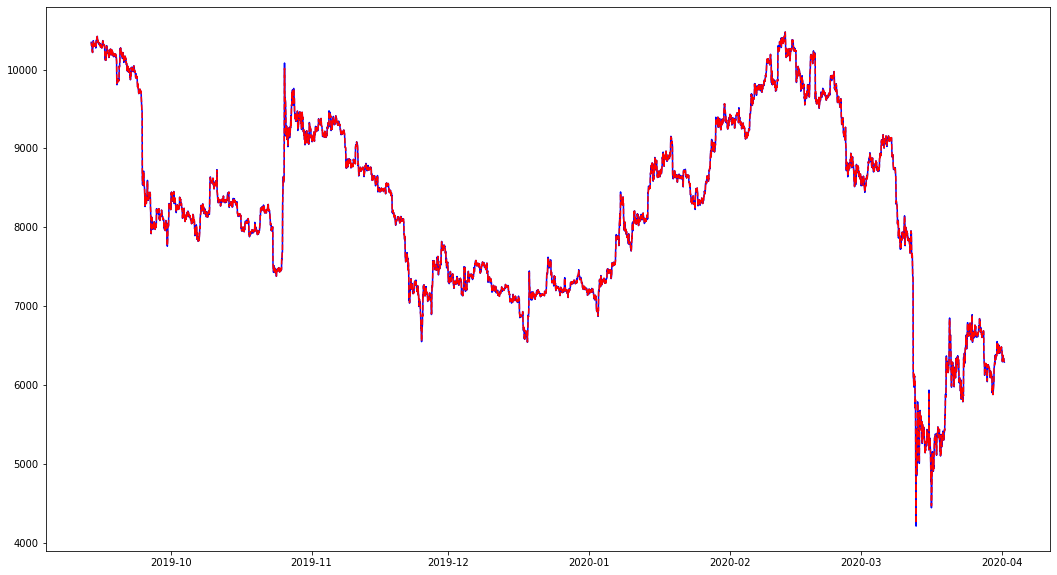

In [20]:
class ARIMAForecast(object):
    
    def __init__(self, df, percentage_train_size):
        
        self.df = df
        self.percentage_train_size = percentage_train_size
    
    def perform(self):
        
        best_order, last_index, best_mdl = self.create_model()
        
        array_pred = np.array([])
                
        for row in self.df.iloc[-last_index:].itertuples():
            
            pred, best_mdl = self.prediction(best_order = best_order, last_index = row[0], model = best_mdl)
            array_pred = np.append(array_pred, pred)
            print('last_index', row[0])
            print('pred', pred)
        
        print('---')
        print('list_pred', array_pred)
        print('df close', self.df.iloc[-last_index:]['Close'].values)
        
        y_true = self.df.iloc[-last_index:]['Close'].values
        y_pred = array_pred.reshape(-1, 1)
        print('len', len(y_true), len(y_pred)) #somente para checar
        data = {
            'y_true': self.df.iloc[-last_index:]['Close'].values,
            'y_pred': array_pred
        }
        
        df_aux = pd.DataFrame(data)
        
        mae, mape, mse, rmse, rmspe, r2, pearson = self.perform_metrics(df_aux['y_true'], df_aux['y_pred'])
        print('mae', mae,
              'mape', mape,
              'mse', mse,
              'rmse', rmse,
              'rmspe', rmspe,
              'r2', r2,
              'pearson', pearson)
        
        fig, ax = plt.subplots(figsize=(18, 10))
        ax.plot(self.df.iloc[-last_index:].index, y_true, color="b", label = "true")
        ax.plot(self.df.iloc[-last_index:].index, y_pred, color="r", linestyle = '--', label = "pred")
        
    def perform_metrics(self, y_truth, y_forecasted): 

        mae = round(mean_absolute_error(y_truth, y_forecasted) ,4)
        mape = round(np.mean(np.abs((y_truth - y_forecasted) / y_truth)) * 100, 4)
        mse = round(mean_squared_error(y_truth, y_forecasted), 4)
        rmse = round(mse**(0.5), 4)
        rmspe = round((np.sqrt(np.mean(np.square((y_truth - y_forecasted) / y_truth)))) * 100, 4)
        r2 = round(r2_score(y_truth, y_forecasted), 4)
        corr, _ = pearsonr(y_truth, y_forecasted)
        pearson = round(corr, 4)

#         print('mae', mae)
#         print('mape', mape)
#         print('mse', mse)
#         print('rmse', rmse)
#         print('rmspe', rmspe)
#         print('r2', r2)
#         print('pearson', pearson)
    
        return mae, mape, mse, rmse, rmspe, r2, pearson
    
    def prediction(self, best_order, last_index, model):
        
#         mod = sm.tsa.statespace.SARIMAX(self.df[:last_index],
#                                         order=(best_order[0], best_order[1], best_order[2]),
#                                         seasonal_order=(0, 0, 0, 0),
#                                         enforce_stationarity=False,
#                                         enforce_invertibility=False)
#         results = mod.fit()
#         pred = results.forecast(steps = 1)
        
#         model = pm.ARIMA(order = best_order) #enforce_stationarity = False
#         model = model.fit(self.df[:last_index])
        
        model = model.update(self.df[last_index:last_index])
        
        
        pred = model.predict(n_periods = 1, alpha = 0.05)[-1]
            
        return pred, model
    
    def create_model(self):
        
        last_index = int(len(self.df)*(1 - self.percentage_train_size))
        
        best_aic = np.inf 
        best_order = None
        best_mdl = None

#         pq_rng = range(10) # [0,1,2,3]
#         d_rng = range(3) # [0,1]
#         for i in pq_rng:
#             for d in d_rng:
#                 for j in pq_rng:
#                     try:
#                         mod = sm.tsa.statespace.SARIMAX(self.df.iloc[:-last_index],
#                                                         order=(i, d, j),
#                                                         seasonal_order=(0, 0, 0, 0),
#                                                         enforce_stationarity=False,
#                                                         enforce_invertibility=False)

#                         results = mod.fit()

#                         tmp_aic = results.aic
#                         if tmp_aic < best_aic:
#                             best_aic = tmp_aic
#                             best_order = (i, d, j)
#                             best_mdl = mod #não esta sendo utilizado
#                     except: continue
        
        model = pm.auto_arima(self.df.iloc[:-last_index],
                              start_p = 0,
                              start_q = 0, 
                              start_d = 0, 
                              max_p = 5,
                              max_d = 2,
                              max_q = 5,
                              seasonal=False)

        best_aic = model.aic()
        best_order = model.order #não esta sendo utilizado
        best_mdl = model
        
        
        print('aic: %6.2f | order: %s'%(best_aic, best_order))

        return best_order, last_index, best_mdl
    
### MAIN

df = df_coinmarket_price_1h.copy()
# df = df_coinmarket_price_d.copy()

df['Date'] = pd.to_datetime(df['Date'])
#print('null\n', df.isnull().sum())

df = df.set_index('Date')
df = df.loc[:, ['Close']]
df = df.sort_values(by = ['Date'])


arima_forecast = ARIMAForecast(df = df, 
                               percentage_train_size = 0.80)
arima_forecast.perform()



In [22]:
# diario
# aic: 21644.13 | order: (1, 1, 1)
# mae 20.9351 mape 0.2591 mse 877.1319 rmse 29.6164 rmspe 0.3744 r2 0.9998 pearson 0.9999
# 80% treino (numero de previssoes: 387) 
# depois de colocar update
# mae 22.3735 mape 0.2792 mse 1009.2598 rmse 31.7688 rmspe 0.406 r2 0.9998 pearson 0.9999

# por hora
# aic: 229438.22 | order: (2, 1, 2)
# mae 2.5702 mape 0.0333 mse 21.1397 rmse 4.5978 rmspe 0.0663 r2 1.0 pearson 1.0
# 80% treino (numero de previssoes: 4824) 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


self.df head              ds        y
1932 2020-03-28  6251.82
1933 2020-03-29  5877.21
1934 2020-03-30  6406.40
1935 2020-03-31  6424.35
1936 2020-04-01  6295.77
head
              ds       y
1899 2020-02-24  9660.0
future
              ds
1900 2020-02-25
forecast
 ds      2020-02-25 00:00:00
yhat                10052.4
Name: 1900, dtype: object
yhat
 10052.439527952027
last_index 2020-02-24 00:00:00
pred 10052.439527952027
head
              ds       y
1900 2020-02-25  9305.0
future
              ds
1901 2020-02-26
forecast
 ds      2020-02-26 00:00:00
yhat                9953.93
Name: 1901, dtype: object
yhat
 9953.931546283662
last_index 2020-02-25 00:00:00
pred 9953.931546283662
head
              ds       y
1901 2020-02-26  8778.3
future
              ds
1902 2020-02-27
forecast
 ds      2020-02-27 00:00:00
yhat                9990.58
Name: 1902, dtype: object
yhat
 9990.579749453591
last_index 2020-02-26 00:00:00
pred 9990.579749453591
head
              ds        y
1902 2020-02

forecast
 ds      2020-03-26 00:00:00
yhat                9106.64
Name: 1930, dtype: object
yhat
 9106.641307562457
last_index 2020-03-25 00:00:00
pred 9106.641307562457
head
              ds        y
1930 2020-03-26  6758.18
future
              ds
1931 2020-03-27
forecast
 ds      2020-03-27 00:00:00
yhat                9112.01
Name: 1931, dtype: object
yhat
 9112.007819273655
last_index 2020-03-26 00:00:00
pred 9112.007819273655
head
              ds        y
1931 2020-03-27  6372.36
future
              ds
1932 2020-03-28
forecast
 ds      2020-03-28 00:00:00
yhat                9163.17
Name: 1932, dtype: object
yhat
 9163.167120511995
last_index 2020-03-27 00:00:00
pred 9163.167120511995
head
              ds        y
1932 2020-03-28  6251.82
future
              ds
1933 2020-03-29
forecast
 ds      2020-03-29 00:00:00
yhat                9167.45
Name: 1933, dtype: object
yhat
 9167.445010965681
last_index 2020-03-28 00:00:00
pred 9167.445010965681
head
              ds        y
1

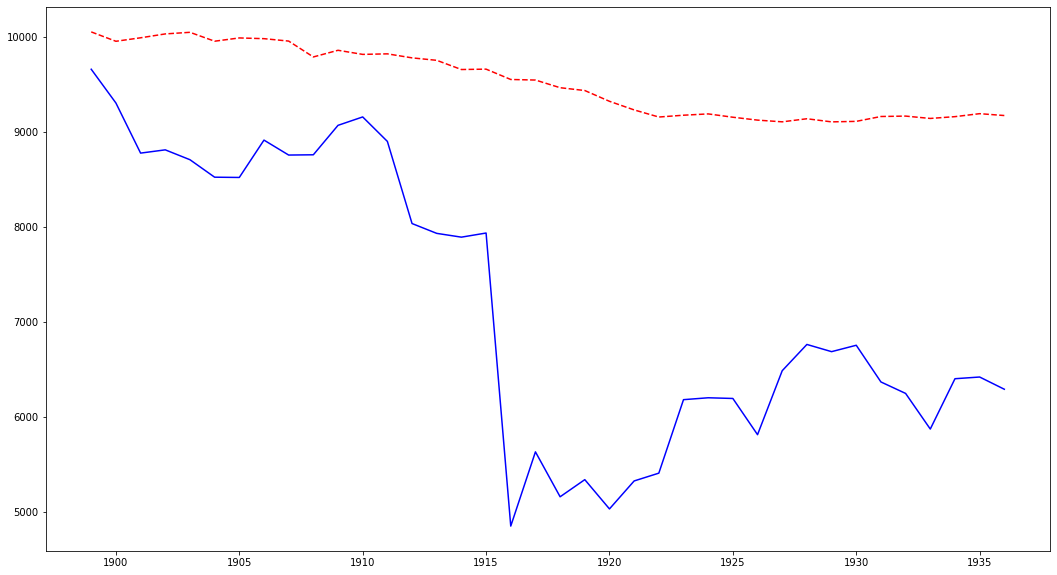

In [44]:
class ProphetForecast(object):
    
    def __init__(self, df, percentage_train_size):
        
        self.df = df
        self.percentage_train_size = percentage_train_size
    
    def perform(self):
        
        self.df.columns = ['ds', 'y']
        print('self.df head', self.df.tail())
        best_order, last_index = self.create_model()
        
        array_pred = np.array([])
                
        for row in self.df.iloc[-last_index:].itertuples():
    
            pred = self.prediction(best_order = best_order, last_index = row[1])
            array_pred = np.append(array_pred, pred)
            print('last_index', row[1])
            print('pred', pred)
        
        print('---')
        print('list_pred', array_pred)
        print('df close', self.df.iloc[-last_index:]['y'].values)
        
        y_true = self.df.iloc[-last_index:]['y'].values
        y_pred = array_pred.reshape(-1, 1)
        print('len', len(y_true), len(y_pred)) #somente para checar
        mape = self.mean_absolute_percentage_error(y_true = y_true, y_pred = y_pred)
        print('mape', mape)
        fig, ax = plt.subplots(figsize=(18, 10))
        ax.plot(self.df.iloc[-last_index:].index, y_true, color="b", label = "true")
        ax.plot(self.df.iloc[-last_index:].index, y_pred, color="r", linestyle = '--', label = "pred")
        
    def mean_absolute_percentage_error(self, y_true, y_pred): 
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
    def prediction(self, best_order, last_index):
        
        model = Prophet(daily_seasonality=True)
        model.fit(self.df[ self.df['ds'] <= last_index])
        future = model.make_future_dataframe(periods=1, freq='D')
        print('head\n', self.df[ self.df['ds'] <= last_index].tail(1))
        print('future\n', future.tail(1))
        forecast = model.predict(future)
        print('forecast\n', forecast.iloc[-1][['ds', 'yhat']])
        print('yhat\n', forecast.iloc[-1]['yhat'])
        return forecast.iloc[-1]['yhat']
    
    def create_model(self):
        
        last_index = int(len(self.df)*(1 - self.percentage_train_size))
        
        best_aic = np.inf 
        best_order = None
        best_mdl = None
        #otimizar treino não implementado
        #yearly_seasonality = False, daily_seasonality = False, weekly_seasonality = False    
        m = Prophet()
        m.fit(self.df[:-last_index])

            
#             tmp_aic = results.aic
#             if tmp_aic < best_aic:
#                 best_aic = tmp_aic
#                 best_order = (i, d, j)
#                 best_mdl = mod #não esta sendo utilizado

#         print('aic: %6.2f | order: %s'%(best_aic, best_order))

        return None, last_index
    
### MAIN

#df = df_coinmarket_price_1h.copy()
df = df_coinmarket_price_d.copy()

df['Date'] = pd.to_datetime(df['Date'])
#print('null\n', df.isnull().sum())

#df = df.set_index('Date')
df = df[['Date', 'Close']]
df = df.sort_values(by = ['Date']).reset_index(drop = True)


prophet_forecast = ProphetForecast(df = df, 
                                    percentage_train_size = 0.98)
prophet_forecast.perform()



In [46]:
#tabela com resultados

In [ ]:
# continuar ...


###########
class MarkovAutoregressionForecast(object):
    
    def __init__(self, df, percentage_train_size):
        
        self.df = df
        self.percentage_train_size = percentage_train_size
    
    def perform(self):
        
        self.df.columns = ['ds', 'y']
        print('self.df head', self.df.tail())
        best_order, last_index = self.create_model()
        
        array_pred = np.array([])
                
        for row in self.df.iloc[-last_index:].itertuples():
    
            pred = self.prediction(best_order = best_order, last_index = row[1])
            array_pred = np.append(array_pred, pred)
            print('last_index', row[1])
            print('pred', pred)
        
        print('---')
        print('list_pred', array_pred)
        print('df close', self.df.iloc[-last_index:]['y'].values)
        
        y_true = self.df.iloc[-last_index:]['y'].values
        y_pred = array_pred.reshape(-1, 1)
        print('len', len(y_true), len(y_pred)) #somente para checar
        mape = self.mean_absolute_percentage_error(y_true = y_true, y_pred = y_pred)
        print('mape', mape)
        fig, ax = plt.subplots(figsize=(18, 10))
        ax.plot(self.df.iloc[-last_index:].index, y_true, color="b", label = "true")
        ax.plot(self.df.iloc[-last_index:].index, y_pred, color="r", linestyle = '--', label = "pred")
        
    def mean_absolute_percentage_error(self, y_true, y_pred): 
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
    def prediction(self, best_order, last_index):
        
        model = Prophet(daily_seasonality=True)
        model.fit(self.df[ self.df['ds'] <= last_index])
        future = model.make_future_dataframe(periods=1, freq='D')
        print('head\n', self.df[ self.df['ds'] <= last_index].tail(1))
        print('future\n', future.tail(1))
        forecast = model.predict(future)
        print('forecast\n', forecast.iloc[-1][['ds', 'yhat']])
        print('yhat\n', forecast.iloc[-1]['yhat'])
        return forecast.iloc[-1]['yhat']
    
    def create_model(self):
        
        last_index = int(len(self.df)*(1 - self.percentage_train_size))
        
        best_aic = np.inf 
        best_order = None
        best_mdl = None
        #otimizar treino não implementado
        #yearly_seasonality = False, daily_seasonality = False, weekly_seasonality = False    
        m = Prophet()
        m.fit(self.df[:-last_index])

            
#             tmp_aic = results.aic
#             if tmp_aic < best_aic:
#                 best_aic = tmp_aic
#                 best_order = (i, d, j)
#                 best_mdl = mod #não esta sendo utilizado

#         print('aic: %6.2f | order: %s'%(best_aic, best_order))

        return None, last_index
    
### MAIN

#df = df_coinmarket_price_1h.copy()
df = df_coinmarket_price_d.copy()

df['Date'] = pd.to_datetime(df['Date'])
#print('null\n', df.isnull().sum())

#df = df.set_index('Date')
df = df[['Date', 'Close']]
df = df.sort_values(by = ['Date']).reset_index(drop = True)


prophet_forecast = ProphetForecast(df = df, 
                                    percentage_train_size = 0.98)
prophet_forecast.perform()